In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\lung_cancer_new\lung-cancer-prediction-main\cancer patient data sets.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wh

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables like 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Drop unnecessary columns
X = df.drop(columns=['Level', 'Patient Id', 'index'])  # Adjust as per your dataset
y = df['Level']


In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data has been split into training and testing sets.")


Data has been split into training and testing sets.


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [6]:
from sklearn.metrics import classification_report

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        63
         2.0       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



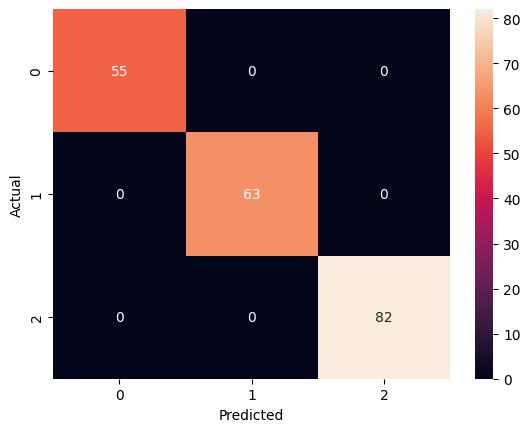

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [9]:
import pickle

# Save the trained model as a .pkl file
with open('lung_cancer_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved successfully!")


Model saved successfully!


In [25]:
# Format the new patient data
new_patient_data = pd.DataFrame([[44, 1, 6, 5, 7, 5, 7, 6, 7, 3, 7, 5, 5, 7, 5, 3, 2, 4, 5, 2, 4, 5, 3]], 
                                columns=X.columns)

# Make a prediction
new_prediction = rf_model.predict(new_patient_data)

# Display the result
print(f"Predicted cancer level: {new_prediction[0]}")


Predicted cancer level: 1.0
